In [34]:
# 1 -> K-means --> numerique
# K-proto variable mixte
# PCA -> visualisation scatter -> hue = cluster

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D

1. Import

In [36]:
df = pd.read_csv('data/gold_2009_2010.csv')

In [63]:
df

,Recency,Frequency,Monetary,Quantity,Ø_Price,∃_items,%_Cancelled,Ø_Qty,Ø_InvoiceQty,Average_Price,Ø_basket,Country,Flag,Cluster
0,725,14,51.76,54,10.498182,28,0.0,1.13,6.909091,12.07,45.00,United Kingdom,🇬🇧,0
1,403,2,1323.32,828,2.295070,70,0.0,13.36,426.042254,2.50,15.29,Iceland,🇮🇸,0
2,437,2,1114.96,1627,1.729459,21,0.0,53.22,777.783784,3.79,11.11,Finland,🇫🇮,0
3,735,4,2646.99,988,8.406449,92,20.0,8.99,469.897196,8.36,-4.83,Italy,🇮🇹,0
4,392,2,343.80,188,3.033333,18,0.0,5.82,99.666667,20.05,23.96,Norway,🇳🇴,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,657,6,619.37,322,2.199401,158,0.0,1.79,67.147465,1.76,2.42,United Kingdom,🇬🇧,0
4385,431,2,436.68,493,4.003103,28,0.0,17.00,476.931034,4.00,16.49,United Kingdom,🇬🇧,0
4386,660,1,427.00,145,8.350000,12,0.0,12.08,145.000000,8.35,35.58,United Kingdom,🇬🇧,0
4387,723,3,1188.43,592,4.379286,67,0.0,8.46,379.857143,4.38,27.23,United Kingdom,🇬🇧,0


### 2. PCA

In [37]:
# Sélection des colonnes numériques pour la PCA
columns = ['Recency', 'Frequency', 'Monetary', 'Quantity', 'Ø_Price', '∃_items', 'Ø_Qty',
           'Ø_InvoiceQty', 'Average_Price', 'Ø_basket']

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])

# Création de l'objet PCA
pca = PCA(n_components=2)

# Appliquer la PCA aux données standardisées
pca_result = pca.fit_transform(df_scaled)

# Création d'un nouveau DataFrame avec les composantes principales
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


# Afficher le DataFrame PCA
print(df_pca.head())

        PC1       PC2
0  0.142509  0.025884
1 -0.380475 -0.328699
2 -0.306838 -0.303097
3  0.238256  0.194781
4 -0.754272 -0.511883


/tmp/ipykernel_200535/736685777.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca['PC1'], df_pca['PC2'], cmap='viridis')


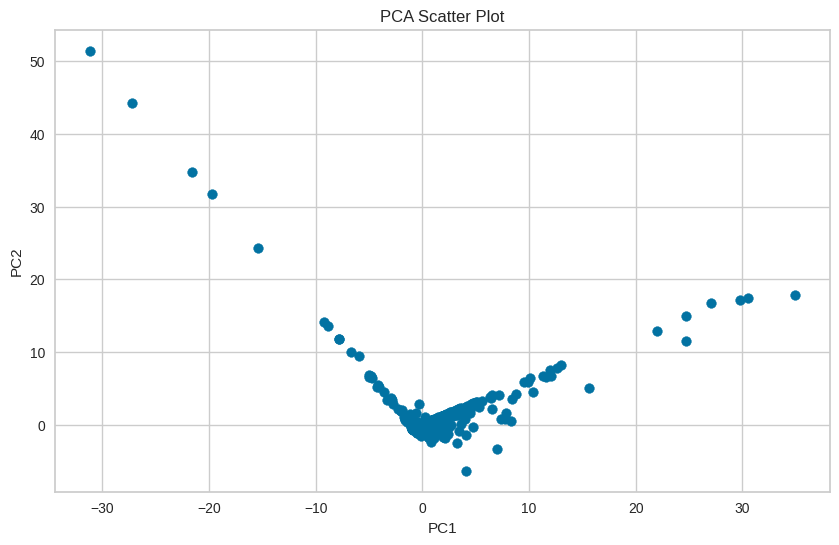

In [38]:
# Scatter plot avec les composantes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

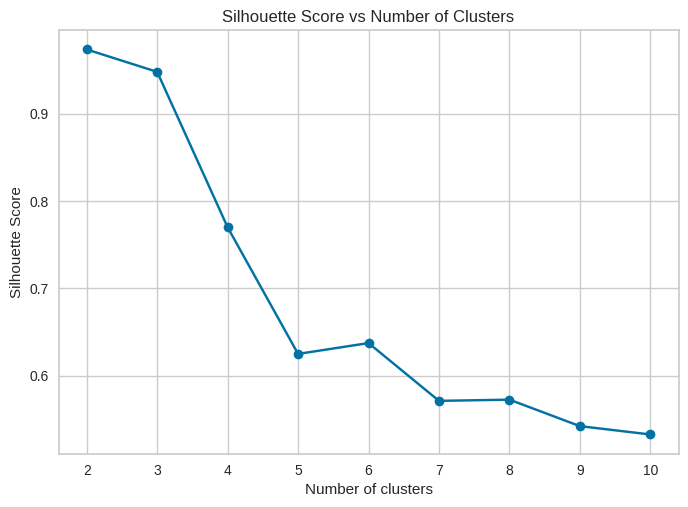

In [39]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


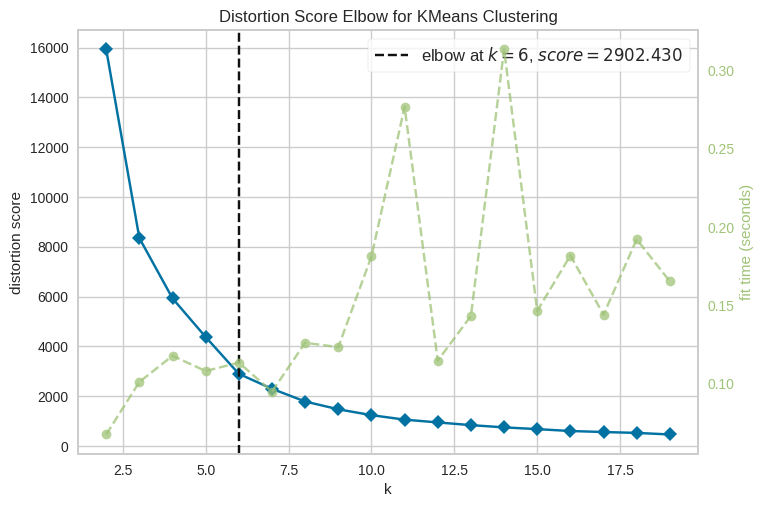

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmeans = KMeans(n_init=10)
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_pca)
elbow.show()

In [41]:
df_no_cat = df.drop(columns=['Country', 'Flag'])


In [42]:
from sklearn.cluster import KMeans

# Sélection des colonnes pour le clustering
columns = ['Recency', 'Frequency', 'Monetary', 'Quantity', 'Ø_Price', '∃_items', 'Ø_Qty', 'Ø_InvoiceQty', 'Average_Price', 'Ø_basket']

# Création du DataFrame pour le clustering
df_cluster = df[columns]

# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=6, n_init='auto')  # Remplacez le nombre de clusters (ici, 4) selon vos besoins

# Entraînement du modèle sur les données
kmeans.fit(df_cluster)

# Prédiction des clusters pour chaque échantillon
cluster_labels = kmeans.predict(df_cluster)

# Ajout des étiquettes de cluster au DataFrame original
df['Cluster'] = cluster_labels

# Affichage du résultat
print(df[['Recency', 'Frequency', 'Monetary', 'Quantity', 'Ø_Price', '∃_items', 'Ø_Qty', 'Ø_InvoiceQty', 'Average_Price', 'Ø_basket', 'Cluster']])


      Recency  Frequency  Monetary  Quantity    Ø_Price  ∃_items  Ø_Qty  \
0         725         14     51.76        54  10.498182       28   1.13   
1         403          2   1323.32       828   2.295070       70  13.36   
2         437          2   1114.96      1627   1.729459       21  53.22   
3         735          4   2646.99       988   8.406449       92   8.99   
4         392          2    343.80       188   3.033333       18   5.82   
...       ...        ...       ...       ...        ...      ...    ...   
4384      657          6    619.37       322   2.199401      158   1.79   
4385      431          2    436.68       493   4.003103       28  17.00   
4386      660          1    427.00       145   8.350000       12  12.08   
4387      723          3   1188.43       592   4.379286       67   8.46   
4388      737          5   2340.61      1425   2.841163       78  19.30   

      Ø_InvoiceQty  Average_Price  Ø_basket  Cluster  
0         6.909091          12.07     45.00 

In [43]:
df.Cluster.value_counts()

0    4182
4     180
2      21
1       4
3       1
5       1
Name: Cluster, dtype: int64

In [45]:


# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=6, n_init='auto')  # Remplacez le nombre de clusters (ici, 4) selon vos besoins

# Entraînement du modèle sur les données réduites avec la PCA
kmeans.fit(pca_result)

# Prédiction des clusters pour chaque échantillon
cluster_labels = kmeans.predict(pca_result)

# Ajout des étiquettes de cluster au DataFrame original
df_pca['Cluster'] = cluster_labels

# Affichage du résultat
df_pca


,PC1,PC2,Cluster
0,0.142509,0.025884,0
1,-0.380475,-0.328699,0
2,-0.306838,-0.303097,0
3,0.238256,0.194781,0
4,-0.754272,-0.511883,0
...,...,...,...
4384,0.244780,0.146245,0
4385,-0.541983,-0.422504,0
4386,-0.397879,-0.332554,0
4387,0.045382,-0.052342,0


In [51]:
df_pca.Cluster.value_counts().sort_index()

0    3604
1       4
2       7
3      32
4      14
5     728
Name: Cluster, dtype: int64

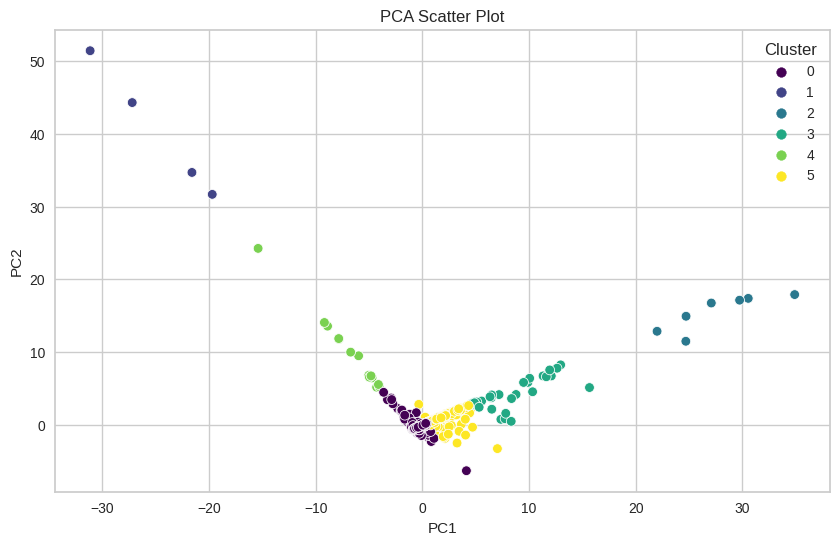

In [53]:
# Scatter plot avec les composantes principales et hue sur le cluster
import seaborn as sns
# Scatter plot avec les composantes principales et hue sur le cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()



In [55]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score ARI
ari_score = adjusted_rand_score(df['Cluster'], df_pca['Cluster'])
print("Adjusted Rand Index (ARI) Score:", ari_score)

Adjusted Rand Index (ARI) Score: 0.3201616279831777


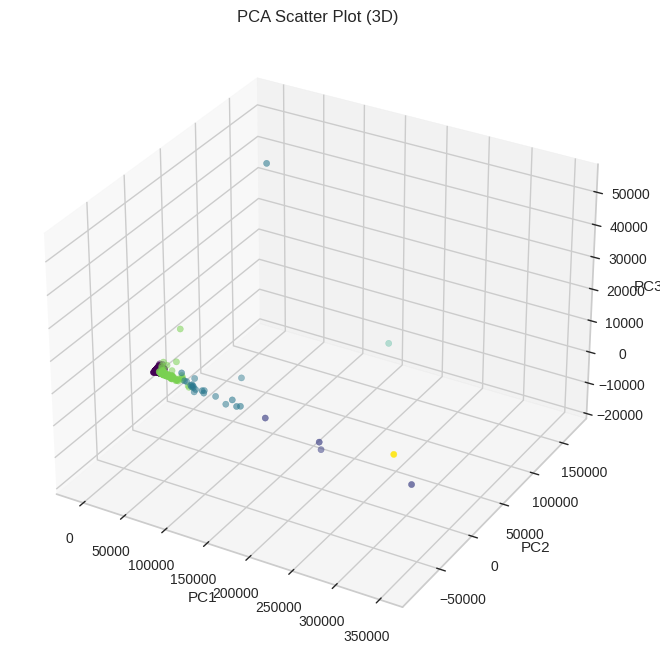

In [66]:

# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les données en 3D en utilisant les 3 composantes principales
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Cluster'], cmap='viridis')

# Étiqueter les axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Titre du graphe
plt.title('PCA Scatter Plot (3D)')

# Afficher le graphe
plt.show()


In [ ]:
# Effectuer la PCA avec 3 composantes principales
pca = PCA(n_components=3)
pca_result3 = pca.fit_transform(df_no_cat)


# Entraînement du modèle sur les données réduites avec la PCA
kmeans.fit(pca_result3)



# Prédiction des clusters pour chaque échantillon
cluster_labels = kmeans.predict(pca_result3)

# Ajout des étiquettes de cluster au DataFrame original
df_pca['Cluster'] = cluster_labels

In [68]:
import plotly.express as px

# Créer une figure 3D
fig = px.scatter_3d(df_pca_3, x='PC1', y='PC2', z='PC3', color='Cluster')

# Personnaliser les axes et le titre
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'),
    title='PCA Scatter Plot (3D)')

# Afficher la figure
fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['PC1', 'PC2', 'PC3'] but received: Cluster

In [ ]:
#Diagramme en radar